# Assignment 1 - Sentiment Analysis - Bryan Tarras

Please note that approximate runtime on my local system is about 1 min 50 seconds. This will differ from the cloud installation of python on CC Labs, but I have checked it and the program does run but at a slower rate.

### 1.0 Data Cleaning

To start lets import the relevant libraires. Note that I have commented out the install of the various libraries (assuming that the system running this will already have the libaries installed).

In [1]:
#!pip install numpy
import numpy as np
#!pip install pandas
import pandas as pd
#!pip install sklearn
import matplotlib.pyplot as plt

##### 1.1 Generic Tweets Cleaning
Lets start with cleaning the Generic Tweet dataset first followed by the Airline Tweet dataset.

In [2]:
df_generic = pd.read_csv('generic_tweets.txt')

In [3]:
df_generic.head()

,class,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df_generic.tail()

,class,id,date,query,user,text
199995,4,1693956088,Mon May 04 00:27:13 PDT 2009,NO_QUERY,FelineBred,"@jvdouglas haha, no, the remark on maternity ..."
199996,4,1693956096,Mon May 04 00:27:14 PDT 2009,NO_QUERY,softthistle,@altitis and to you!
199997,4,1693956099,Mon May 04 00:27:14 PDT 2009,NO_QUERY,elysion32,Okie doke!! Time for me to escape for the Nort...
199998,4,1693956134,Mon May 04 00:27:14 PDT 2009,NO_QUERY,fancyjessy,"finished the lessons, hooray!"
199999,4,1693956160,Mon May 04 00:27:14 PDT 2009,NO_QUERY,noraezan,Some ppl are just fucking KP0. Cb ! Stop askin...


First up lets remove HTML tags, attributes, and character codes (replaced with ASCII equilvalents). To do this the Beautiful Soup library will be used. This will be tested using a tweet which is known to have HTML character codes, tweet [145]. 

In [5]:
from bs4 import BeautifulSoup

In [6]:
df_generic.text[145] # Original Tweet

"@twista202 I still haven't read the 9th&amp;10th Princess diaries  Saving Francesca made me cry at the end. Hmm those are easy books."

In [7]:
testing = BeautifulSoup(df_generic.text[145],'lxml') # Beautiful soup applied to the original tweet, note the removal of "&amp" and replacement with "&"
print (testing.get_text())

@twista202 I still haven't read the 9th&10th Princess diaries  Saving Francesca made me cry at the end. Hmm those are easy books.


Next up the URLs in the tweets will be removed. To accomplish this the Regular Expressions library will be used. This will be tested using a tweet known to contain a URL within it, tweet [0].

In [8]:
df_generic.text[0] # Original Tweet

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [9]:
import re
re.sub('https?://[A-Za-z0-9./]+','',df_generic.text[0]) # Tweet with the URL removed

"@switchfoot  - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

Following this all characters will in the text will be converted to lowercase. To accomplish this the string lower() method will be used. This will be tested on tweet [0] as well below.

In [10]:
df_generic.text[0] # Original Tweet

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [11]:
df_generic.text[0].lower() # .lower function applied to the tweet to ensure that it is in all lowercase

"@switchfoot http://twitpic.com/2y1zl - awww, that's a bummer.  you shoulda got david carr of third day to do it. ;d"

Next, stopwords contained within the tweets will be removed. To accomplish this the "nltk" or natural language toolkit library in python will be used. Contained within "nltk" is a file containing common stop words. This file is downloaded using the nltk.download('stopwords') command. These are the words that are being considered as stop words and which will be removed from the tweets. This will be tested below with tweet [0] which is known to contain stop words.

In [12]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\btarras\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
temp = df_generic.text[0].lower().split() #Splitting of the tweet is required to do a full string comparison with the stop word

In [14]:
temp

['@switchfoot',
 'http://twitpic.com/2y1zl',
 '-',
 'awww,',
 "that's",
 'a',
 'bummer.',
 'you',
 'shoulda',
 'got',
 'david',
 'carr',
 'of',
 'third',
 'day',
 'to',
 'do',
 'it.',
 ';d']

In [15]:
filtered_words = [word for word in temp if word not in stopwords.words('english')]

In [16]:
filtered_words

['@switchfoot',
 'http://twitpic.com/2y1zl',
 '-',
 'awww,',
 "that's",
 'bummer.',
 'shoulda',
 'got',
 'david',
 'carr',
 'third',
 'day',
 'it.',
 ';d']

In [17]:
(" ").join(filtered_words) #After splitting and removing the stop words, the tweet will be rejoined with appropiate spacing.

"@switchfoot http://twitpic.com/2y1zl - awww, that's bummer. shoulda got david carr third day it. ;d"

With the above method for cleaning the tweets analyzed on single tweets, a function will be developed which when called will remove all required elements from the tweets (HTML tags/attributes, HTML character codes replaced with ASCII equilvalents, URLs removed, all characters in lowercase, all stop words contained within the nltk libraries stop word corpus removed). Note that I have opted to use the WordPunctTokenizer contianed within the nltk library instead of the split() command discussed above to save on computational time.

This function will be tested by sending in the first 3 tweets within the dataframe containing the tweets.

In [18]:
stops = set(stopwords.words("english")) # Setting the stopwords to a vraible to speed up run time

from nltk.tokenize import WordPunctTokenizer # Importing of the WordPunctTokenizer function from the nltk library
tok = WordPunctTokenizer() # Setting the tokenization function equal to a variable for easier calling
def tweet_cleaning(text): # Tweet cleaning function
    stripped = re.sub('https?://[A-Za-z0-9./]+','',text) # URL Removal
    stripped_3 = re.sub("[^a-zA-Z]", " ", stripped) # Hashtag/Number Removal
    soup = BeautifulSoup(stripped_3, 'lxml') # HTML Coding Removal
    souped = soup.get_text() # HTML Coding Removal
    lower_case = souped.lower() # Lower Case Conversion
    words_only = tok.tokenize(lower_case) # Tokenize to allow for full word comaprison with stop words file
    stop_words_removed = [word for word in words_only if word not in stops] #Stop Words Removal
    return (" ".join(stop_words_removed)).strip() # Rejoin the tweet with proper spacing

# Below is a test of the function to ensure that it is properly functioning. The first 3 tweets contained within the dataframe
# are past through the function and then printed.
testing = df_generic.text[:3]
test_result = []
for x in testing:
    test_result.append(tweet_cleaning(x))
test_result

['switchfoot awww bummer shoulda got david carr third day',
 'upset update facebook texting might cry result school today also blah',
 'kenichan dived many times ball managed save rest go bounds']

As can be seen from the cell above and the test result the function appears to be running properly, and all required information has been removed from the tweets leaving a format that is more ammendable to processing through a Machine Learning Algorithm. 

The next step is to apply this to the entire tweet data set of 200,000 tweets. To do this I have employed the use of the .apply() function and allocated a new coloumn to the dataframe "df" of "Clean Text".

In [19]:
df_generic["Clean Text"] = df_generic["text"].apply(lambda x: tweet_cleaning(x)) #This is about a 40 second runtime on my hardware setup

To verify if the added coloumn to the dataframe "df" has properly been stored I will call the head(), tail() and count() function again.

In [20]:
df_generic.head()

,class,id,date,query,user,text,Clean Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot awww bummer shoulda got david carr ...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset update facebook texting might cry result...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dived many times ball managed save re...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving mad see


In [21]:
df_generic.tail()

,class,id,date,query,user,text,Clean Text
199995,4,1693956088,Mon May 04 00:27:13 PDT 2009,NO_QUERY,FelineBred,"@jvdouglas haha, no, the remark on maternity ...",jvdouglas haha remark maternity leave fired li...
199996,4,1693956096,Mon May 04 00:27:14 PDT 2009,NO_QUERY,softthistle,@altitis and to you!,altitis
199997,4,1693956099,Mon May 04 00:27:14 PDT 2009,NO_QUERY,elysion32,Okie doke!! Time for me to escape for the Nort...,okie doke time escape north massa back turned ...
199998,4,1693956134,Mon May 04 00:27:14 PDT 2009,NO_QUERY,fancyjessy,"finished the lessons, hooray!",finished lessons hooray
199999,4,1693956160,Mon May 04 00:27:14 PDT 2009,NO_QUERY,noraezan,Some ppl are just fucking KP0. Cb ! Stop askin...,ppl fucking kp cb stop asking laa love boyfrie...


In [22]:
df_generic.count()

class         200000
id            200000
date          200000
query         200000
user          200000
text          200000
Clean Text    200000
dtype: int64

##### 1.2 Airline Tweets Cleaning
Next up is cleaning the Airline Tweets. The same preprocessing of the tweets that was done to the Generic Tweets will be applied to the Airline Tweets. 

In [23]:
df_airline = pd.read_csv('US_airline_tweets.csv')

In [24]:
df_airline.head()

,id,sentiment,negative_reason,user,retweet_count,text
0,5.703010e+17,positive,NaN,jnardino,0,@VirginAmerica plus you've added commercials t...
1,5.703010e+17,negative,Bad Flight,jnardino,0,@VirginAmerica it's really aggressive to blast...
2,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica and it's a really big bad thing...
3,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...
4,5.703010e+17,positive,NaN,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX..."


In [25]:
df_airline.tail()

,id,sentiment,negative_reason,user,retweet_count,text
11536,5.695880e+17,negative,Cancelled Flight,RussellsWriting,0,@AmericanAir my flight was Cancelled Flightled...
11537,5.695880e+17,negative,Late Flight,GolfWithWoody,0,@AmericanAir right on cue with the delaysðŸ‘Œ
11538,5.695880e+17,positive,NaN,KristenReenders,0,@AmericanAir thank you we got on a different f...
11539,5.695870e+17,negative,Customer Service Issue,itsropes,0,@AmericanAir leaving over 20 minutes Late Flig...
11540,5.695870e+17,negative,Customer Service Issue,SraJackson,0,"@AmericanAir you have my money, you change my ..."


Beautiful Soup to remove HTML tags and attributes along with HTML character codes

In [26]:
df_airline.text[1] # Original Tweet

'@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse'

In [27]:
testing = BeautifulSoup(df_airline.text[1],'lxml') # Beautiful soup modified tweet
print (testing.get_text())

@VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces & they have little recourse


Removal of the URL

In [28]:
df_airline.text[121] # Original Tweet

'ðŸ˜Ž RT @VirginAmerica: Youâ€™ve met your match. Got status on another airline? Upgrade (+restr): http://t.co/RHKaMx9VF5. http://t.co/PYalebgkJt'

In [29]:
import re
re.sub('https?://[A-Za-z0-9./]+','',df_airline.text[121]) # Regular Expression Modified Tweet

'ðŸ˜Ž RT @VirginAmerica: Youâ€™ve met your match. Got status on another airline? Upgrade (+restr):  '

Convert to all lower case.

In [30]:
df_airline.text[0] # Original Tweet

"@VirginAmerica plus you've added commercials to the experience... tacky."

In [31]:
df_airline.text[0].lower() # .lower() modified tweet

"@virginamerica plus you've added commercials to the experience... tacky."

Similar to what was done for the Generic Tweets, we will remove the Removal of Stop Words

In [32]:
temp = df_airline.text[0].lower().split()

In [33]:
temp

['@virginamerica',
 'plus',
 "you've",
 'added',
 'commercials',
 'to',
 'the',
 'experience...',
 'tacky.']

In [34]:
filtered_words = [word for word in temp if word not in stopwords.words('english')]
filtered_words

['@virginamerica', 'plus', 'added', 'commercials', 'experience...', 'tacky.']

In [35]:
(" ").join(filtered_words)

'@virginamerica plus added commercials experience... tacky.'

The same tweet_cleaning function defined above will be used for the airline_df as was done for the generic tweets. With this said a test on the first 3 airline tweets will be done to ensure that function calls are working correctly.

In [36]:
# Below is a test of the function to ensure that it is properly functioning. The first 3 tweets contained within the dataframe
# are past through the function and then printed.
testing = df_airline.text[:3]
test_result = []
for x in testing:
    test_result.append(tweet_cleaning(x))
test_result

['virginamerica plus added commercials experience tacky',
 'virginamerica really aggressive blast obnoxious entertainment guests faces amp little recourse',
 'virginamerica really big bad thing']

As can be seen from the cell above and the test result the function appears to be running properly, and all required information has been removed from the tweets leaving a format that is more ammendable to processing through a Machine Learning Algorithm. 

The next step is to apply this to the entire tweet data set of 200,000 tweets. To do this I have employed the use of the .apply() function and allocated a new coloumn to the dataframe "df_airline" of "Clean Text".

In [37]:
df_airline["Clean Text"] = df_airline["text"].apply(lambda x: tweet_cleaning(x)) #This is about a 3 second runtime on my hardware setup

To verify if the added coloumn to the dataframe "df" has properly been stored I will call the head(), tail() and count() function again.

In [38]:
df_airline.head()

,id,sentiment,negative_reason,user,retweet_count,text,Clean Text
0,5.703010e+17,positive,NaN,jnardino,0,@VirginAmerica plus you've added commercials t...,virginamerica plus added commercials experienc...
1,5.703010e+17,negative,Bad Flight,jnardino,0,@VirginAmerica it's really aggressive to blast...,virginamerica really aggressive blast obnoxiou...
2,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica and it's a really big bad thing...,virginamerica really big bad thing
3,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,virginamerica seriously would pay flight seats...
4,5.703010e+17,positive,NaN,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",virginamerica yes nearly every time fly vx ear...


In [39]:
df_airline.tail()

,id,sentiment,negative_reason,user,retweet_count,text,Clean Text
11536,5.695880e+17,negative,Cancelled Flight,RussellsWriting,0,@AmericanAir my flight was Cancelled Flightled...,americanair flight cancelled flightled leaving...
11537,5.695880e+17,negative,Late Flight,GolfWithWoody,0,@AmericanAir right on cue with the delaysðŸ‘Œ,americanair right cue delays
11538,5.695880e+17,positive,NaN,KristenReenders,0,@AmericanAir thank you we got on a different f...,americanair thank got different flight chicago
11539,5.695870e+17,negative,Customer Service Issue,itsropes,0,@AmericanAir leaving over 20 minutes Late Flig...,americanair leaving minutes late flight warnin...
11540,5.695870e+17,negative,Customer Service Issue,SraJackson,0,"@AmericanAir you have my money, you change my ...",americanair money change flight answer phones ...


In [40]:
df_airline.count()

id                 11541
sentiment          11541
negative_reason     9178
user               11541
retweet_count      11541
text               11541
Clean Text         11541
dtype: int64

### 2.0 Exploratory Analysis
Matplotlib and seaborn will both be imported and will be used for data visualzations

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

The function below determines the tweet count associated with each respective airline in the airline dataset. Note the keywords of interest that I have looked for are "americanair", "usairways", "jetblue", "southwestair", "united", "virginamerica", "deltaassit", and no airline mention.

In [42]:
def airline_counter(text): # Function to count the number of times each airline is mentioned and the number of positives vs negatives
    airline_result_counter = [0]*8
    airline_result_sentiment_negative = [0]*8
    airline_result_sentiment_positive = [0]*8
    
    for i in range(0,11540):
        if ("americanair") in text[i]:
            airline_result_counter[0] = airline_result_counter[0] + 1 # Count the number of tweets associated with americanair
            if df_airline["sentiment"][i] == "negative":
                airline_result_sentiment_negative[0] = airline_result_sentiment_negative[0] + 1
            else:
                airline_result_sentiment_positive[0] = airline_result_sentiment_positive[0] + 1
            
        elif ("usairways") in text [i]:
            airline_result_counter[1] = airline_result_counter[1] + 1 # Count the number of tweets associated with usairways
            if df_airline["sentiment"][i] == "negative":
                airline_result_sentiment_negative[1] = airline_result_sentiment_negative[1] + 1
            else:
                airline_result_sentiment_positive[1] = airline_result_sentiment_positive[1] + 1
                
        elif ("jetblue") in text[i]:
            airline_result_counter[2] = airline_result_counter[2] + 1 # Count the number of tweets associated with jetblue
            if df_airline["sentiment"][i] == "negative":
                airline_result_sentiment_negative[2] = airline_result_sentiment_negative[2] + 1
            else:
                airline_result_sentiment_positive[2] = airline_result_sentiment_positive[2] + 1
                
        elif ("southwestair") in text [i]:
            airline_result_counter[3] = airline_result_counter[3] + 1 # Count the number of tweets associated with southwestair
            if df_airline["sentiment"][i] == "negative":
                airline_result_sentiment_negative[3] = airline_result_sentiment_negative[3] + 1
            else:
                airline_result_sentiment_positive[3] = airline_result_sentiment_positive[3] + 1
                
        elif ("united") in text [i]:
            airline_result_counter[4] = airline_result_counter[4] + 1 # Count the number of tweets associated with united
            if df_airline["sentiment"][i] == "negative":
                airline_result_sentiment_negative[4] = airline_result_sentiment_negative[4] + 1
            else:
                airline_result_sentiment_positive[4] = airline_result_sentiment_positive[4] + 1
                
        elif ("virginamerica") in text [i]:
            airline_result_counter[5] = airline_result_counter[5] + 1 # Count the number of tweets associated with virginamerica
            if df_airline["sentiment"][i] == "negative":
                airline_result_sentiment_negative[5] = airline_result_sentiment_negative[5] + 1
            else:
                airline_result_sentiment_positive[5] = airline_result_sentiment_positive[5] + 1
                
        elif ("deltaassist") in text [i]:
            airline_result_counter[6] = airline_result_counter[6] + 1 # Count the number of tweets associated with deltaassist
            if df_airline["sentiment"][i] == "negative":
                airline_result_sentiment_negative[6] = airline_result_sentiment_negative[6] + 1
            else:
                airline_result_sentiment_positive[6] = airline_result_sentiment_positive[6] + 1
                
        else:
            airline_result_counter[7] = airline_result_counter[7] + 1 # Count the number of tweets not with no airline mention
            if df_airline["sentiment"][i] == "negative":
                airline_result_sentiment_negative[7] = airline_result_sentiment_negative[7] + 1
            else:
                airline_result_sentiment_positive[7] = airline_result_sentiment_positive[7] + 1
                
    return (airline_result_counter, airline_result_sentiment_negative, airline_result_sentiment_positive)    

airline_counter_results,airline_sentiment_result_negative,airline_sentiment_result_positive = airline_counter(df_airline['Clean Text'])

In [43]:
print (airline_counter_results)
print (airline_sentiment_result_negative)
print (airline_sentiment_result_positive)

[2457, 2414, 1498, 1745, 3095, 328, 2, 1]
[2103, 2152, 957, 1174, 2611, 178, 2, 0]
[354, 262, 541, 571, 484, 150, 0, 1]


Create a new data frame that holds the number of occurances for each airline.

In [44]:
airline_counter_df= pd.DataFrame(airline_counter_results, columns=['Number of Occurances'])
airline_counter_df["Airline"] = ("American Air","US Airways", "Jet Blue", "South West Air", "United", "Virgin America", "Delta Assist", "No Airline")
airline_counter_df["# of Negative"] = airline_sentiment_result_negative
airline_counter_df["# of Positive"] = airline_sentiment_result_positive
airline_counter_df

,Number of Occurances,Airline,# of Negative,# of Positive
0,2457,American Air,2103,354
1,2414,US Airways,2152,262
2,1498,Jet Blue,957,541
3,1745,South West Air,1174,571
4,3095,United,2611,484
5,328,Virgin America,178,150
6,2,Delta Assist,2,0
7,1,No Airline,0,1


As can be seen there is one data entry which doesn't specifically mention any specifc airline. Rather it is from an airline in response to another tweet. I will leave the entry in the table, but it is interesting to note. Further there are only 2 tweets directed at Delta Assist and only 328 at Virign America. These are substantially less the the remaining airlines.

In [45]:
%matplotlib inline

For vizualizations I will first resize the figure size to ensure that the plots are readable.

In [46]:
from matplotlib.pyplot import figure
fig_size = plt.rcParams["figure.figsize"]
print ("Current size:"), fig_size

Current size:


(None, [6.0, 4.0])

In [47]:
fig_size[0] = 12
fig_size[1] = 9
print ("Current size:"), fig_size

Current size:


(None, [12, 9])

The first plot shows the Airline tweets associated with each airline and the number of occurances or the number of times a tweet was mentioned @ a specific airline. As can be noted the airline mentioned the most is Untied, and the airline mentioned the least is Delta Assist

Text(0.5, 1.0, 'Airline Tweets')

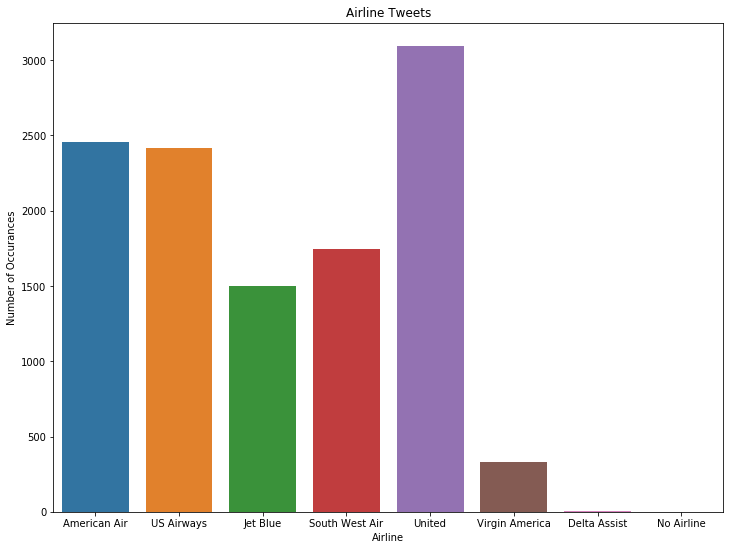

In [48]:
sns.barplot(x='Airline',y='Number of Occurances',data=airline_counter_df).set_title('Airline Tweets')

From the figure above it can be conlcuded that there is not an even distribution of airline tweets from each respective airline. More specifically the number of tweets correlating with United Airlines signficiantly outnumbers all other airlines and Delta Assist has only 2 tweets correlated with it. Further from the airline_counter_df calculated above it can be seen that all airlines have signficiantly more negative tweets associated with them then positve tweets. 

For plotting and analysis purposes I will convert the sentiment text of positve or negative to a sentiment value correlating to 1 for positve or 0 for negative. This will be added as a new coloumn in the dataframe "df_airline". This is done in the cell block below.

In [49]:
def sentiment_value (sentiment):
    if sentiment == ("negative"):
        sentiment_value = 0
    elif sentiment == ("positive"):
        sentiment_value = 1
    return (sentiment_value)

df_airline['Sentiment Value'] = df_airline['sentiment'].apply(lambda x: sentiment_value(x))

df_airline.head()

,id,sentiment,negative_reason,user,retweet_count,text,Clean Text,Sentiment Value
0,5.703010e+17,positive,NaN,jnardino,0,@VirginAmerica plus you've added commercials t...,virginamerica plus added commercials experienc...,1
1,5.703010e+17,negative,Bad Flight,jnardino,0,@VirginAmerica it's really aggressive to blast...,virginamerica really aggressive blast obnoxiou...,0
2,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica and it's a really big bad thing...,virginamerica really big bad thing,0
3,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,virginamerica seriously would pay flight seats...,0
4,5.703010e+17,positive,NaN,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",virginamerica yes nearly every time fly vx ear...,1


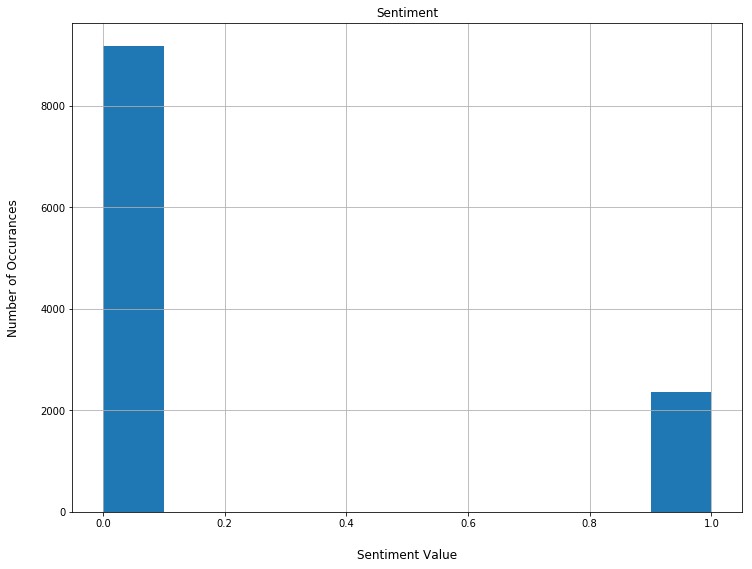

In [50]:
plot = df_airline.hist(column='Sentiment Value')

plot = plot[0]
for x in plot:
    x.set_title("Sentiment")
    x.set_xlabel("Sentiment Value", labelpad=20, size=12)
    x.set_ylabel("Number of Occurances", labelpad=20, size=12)

From the graph above it is obvious that the distribution of tweets about the airlines is largely negative. If the number of positive tweets to negative tweets is calculated (see cell block below) it can be seen that there are 9,178 negative tweets and 2,363 postive tweets. If used as a target variable there will undoubtedly be class imbalances. Care will have to be taken when training a model on this data. That said the assignment only calls for using the negative tweets as training data for the second model. Further analysis which will be conducted later on in this notebook will show that there are class imbalances that also exist in the negative reasons for the negative tweets. These imbalances cause issues an inaccuracies in the resultant predictions.

In [51]:
sentiment_counter = [0]*2

def sentiment_count (sentiment):
    if sentiment == ("negative"):
        sentiment_counter[0] = sentiment_counter[0] + 1
    elif sentiment == ("positive"):
        sentiment_counter[1] = sentiment_counter[1] + 1
    return (sentiment_counter)

test = df_airline['sentiment'].apply(lambda x: sentiment_count(x))
print (test[1])

[9178, 2363]


Next I will examine figures relevant to the generic tweet dataset.

First for further processing I will need to remove any NAN references to the text that are present after the cleaning of the data. I will replace these with an empty space ('').

In [52]:
df_generic['Clean Text'] = df_generic['Clean Text'].replace(np.nan, '', regex=True)

I have decided to calaculate the tweet character length as well as the tweet word length based on the Clean Text coloumn. The cell block below calculates both of these. The results of which will be used for visual representations as well as features in the machine learning model (feature engineering).

In [53]:
df_generic['Tweet Character Length'] = df_generic['Clean Text'].apply(len)

def length_of_tweet (text):
    temp = text.split()
    generic_tweet_length = len(temp)
    return (generic_tweet_length)

df_generic['Tweet Word Length'] = df_generic['Clean Text'].apply(lambda x: length_of_tweet(x))

In [54]:
df_generic.tail()

,class,id,date,query,user,text,Clean Text,Tweet Character Length,Tweet Word Length
199995,4,1693956088,Mon May 04 00:27:13 PDT 2009,NO_QUERY,FelineBred,"@jvdouglas haha, no, the remark on maternity ...",jvdouglas haha remark maternity leave fired li...,50,7
199996,4,1693956096,Mon May 04 00:27:14 PDT 2009,NO_QUERY,softthistle,@altitis and to you!,altitis,7,1
199997,4,1693956099,Mon May 04 00:27:14 PDT 2009,NO_QUERY,elysion32,Okie doke!! Time for me to escape for the Nort...,okie doke time escape north massa back turned ...,60,11
199998,4,1693956134,Mon May 04 00:27:14 PDT 2009,NO_QUERY,fancyjessy,"finished the lessons, hooray!",finished lessons hooray,23,3
199999,4,1693956160,Mon May 04 00:27:14 PDT 2009,NO_QUERY,noraezan,Some ppl are just fucking KP0. Cb ! Stop askin...,ppl fucking kp cb stop asking laa love boyfrie...,54,10


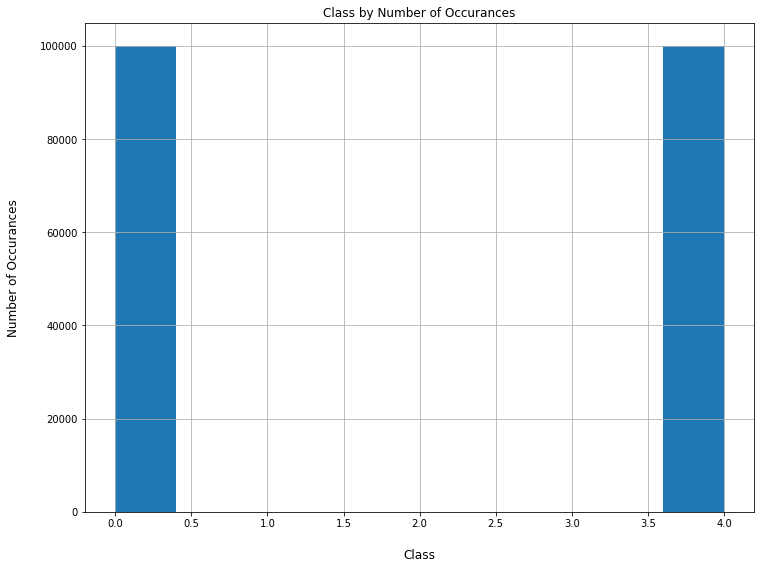

In [55]:
plot2 = df_generic.hist(column='class')

plot2 = plot2[0]
for x in plot2:
    x.set_title("Class by Number of Occurances")
    x.set_xlabel("Class", labelpad=20, size=12)
    x.set_ylabel("Number of Occurances", labelpad=20, size=12)

From the figure above it is obvious that there are equal number of class 0 and class 4 tweets. This is good as it will prevent any class imbalances during the training of the model.

Next I will plot the Tweet Word Length its number of occurances by the class it is atrributed to. As can be seen the distribution between the two classes is very similar with the class 0 tweets typcially being smaller but with a high standard deviation when compared to the class 4 tweets.

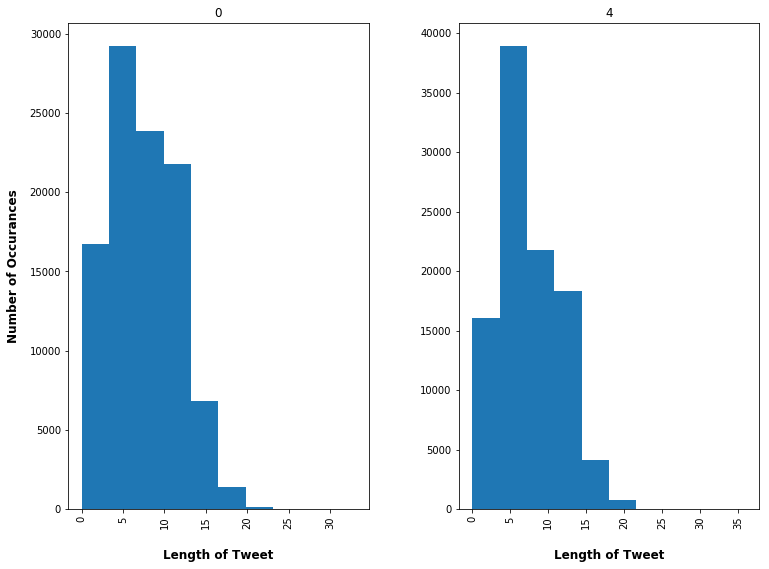

In [56]:
plot3 = df_generic.hist('Tweet Word Length',by='class')

for i,x in enumerate(plot3):
    
    x.set_xlabel("Length of Tweet", labelpad=20, weight='bold', size=12)
    if i == 1:
        x.set_ylabel("Number of Occurances", labelpad=400, weight='bold', size=12)

This concludes section 2.0 for exploratory analysis. There are further figures and analysis presented in the Bonus section that add to the discussion above but are not apart of the requirements of the assignment.

### 3.0 Model Preparation and 4.0 Model Implementation
The following contains the model preparation stage and implementation stage.

To start we will first take the optional corpus provided and convert it to a dataframe followed by a dictionary. The ultimate purpose of which will be to assign a score to each tweet based on how many words match the corpus and their associated values. This will be included as an additional feature in the Machine Learning model developed in section 4.0. 

First lets open the corpus and assign it to a varaible.

In [57]:
corpus = open('corpus.txt','r').read()
print (corpus[0:47])

abandon	-2
abandoned	-2
abandons	-2
abducted	-2


Next we need to format the above corpus data into something that can be inputted properly into a dataframe with the word and the score as sperate coloumns in a dataframe

In [58]:
corpus_list = corpus.split('\n')
corpus_list_2 = [0]*2477
for i in range(0,2477):
    corpus_list_2[i] = corpus_list[i].split("\t")       

In [59]:
corpus_word_key = [0]*2477
corpus_word_value = [0]*2477
for i in range(0,2477):
    corpus_word_key[i] = corpus_list_2[i][0] 
    corpus_word_value[i] = corpus_list_2[i][1]

Create two data frames one to hold the Word List and the Word Value. These dataframes will be merged to one following this.

In [60]:
corpus_df = pd.DataFrame(corpus_word_key, columns=['Word List'])
corpus_df_2 = pd.DataFrame(corpus_word_value, columns=['Word Value'])

In [61]:
corpus_df['Word Value'] = corpus_df_2['Word Value']

In [62]:
corpus_df.head()

,Word List,Word Value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [63]:
corpus_df.tail()

,Word List,Word Value
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2
2476,zealous,2


In [64]:
corpus_df["Word Value Int"] = corpus_df['Word Value'].apply(lambda x: int(x))

corpus_df.head()

,Word List,Word Value,Word Value Int
0,abandon,-2,-2
1,abandoned,-2,-2
2,abandons,-2,-2
3,abducted,-2,-2
4,abduction,-2,-2


With the corpus data extracted and stored in a dataframe, I will zip it into a dictionary as this is a more useful format.

In [65]:
corpus_dictionary = dict(zip(corpus_df["Word List"], corpus_df["Word Value Int"]))

As an additional feature to the model, I have decided to include the number of matches in the cleaned text with the provided corpus. To do this I first determined which words in the cleaned dataset matched the corpus data and then determined the number of elements that matched for each tweet. The number of list matches can be calculated as below. Note I have added this as an additional coloumn in the df_generic dataframe.

In [66]:
list_of_matches = [0]*200000 # Create a list of size 200,000 to store the list of matches
for i in range (0,200000): # Check which words match up in the cleaned tweets with the corpus
    temp = (df_generic["Clean Text"][i]).split()
    temp2 = (corpus_df["Word List"])
    list_of_matches[i] = (list (set(temp) & set(temp2)))

In [67]:
df_generic['List of Matches'] = list_of_matches # Add a new coloumn in the dataframe to store the list of matches information
df_generic.tail()

,class,id,date,query,user,text,Clean Text,Tweet Character Length,Tweet Word Length,List of Matches
199995,4,1693956088,Mon May 04 00:27:13 PDT 2009,NO_QUERY,FelineBred,"@jvdouglas haha, no, the remark on maternity ...",jvdouglas haha remark maternity leave fired li...,50,7,"[fired, leave, haha]"
199996,4,1693956096,Mon May 04 00:27:14 PDT 2009,NO_QUERY,softthistle,@altitis and to you!,altitis,7,1,[]
199997,4,1693956099,Mon May 04 00:27:14 PDT 2009,NO_QUERY,elysion32,Okie doke!! Time for me to escape for the Nort...,okie doke time escape north massa back turned ...,60,11,[escape]
199998,4,1693956134,Mon May 04 00:27:14 PDT 2009,NO_QUERY,fancyjessy,"finished the lessons, hooray!",finished lessons hooray,23,3,[]
199999,4,1693956160,Mon May 04 00:27:14 PDT 2009,NO_QUERY,noraezan,Some ppl are just fucking KP0. Cb ! Stop askin...,ppl fucking kp cb stop asking laa love boyfrie...,54,10,"[love, stop, fucking]"


With the list of matches for each tweet computed, the next step is to determine the length of each of these lists. This can be done using the number of matches function below. Since the corpus contains words that have a significant sentiment score attached to them, it stands to reason that there would be a correlation with the number of word matches in the cleaned text and the corpus and the tweets associated sentiment. As such I have also calculated the score based on the matched words from the cleaned tweets in the corpus file and summed their associated scores to recieve an overall tweet score.

In [68]:
def number_of_matches (text): # Number of matches function
    number_of_matches = len(text)
    return (number_of_matches)

df_generic['Number of Matches'] = df_generic['List of Matches'].apply(lambda x: number_of_matches(x))

In [69]:
df_generic.head()

,class,id,date,query,user,text,Clean Text,Tweet Character Length,Tweet Word Length,List of Matches,Number of Matches
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot awww bummer shoulda got david carr ...,55,9,[bummer],1
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset update facebook texting might cry result...,69,11,"[cry, blah, upset]",3
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dived many times ball managed save re...,58,10,[save],1
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire,32,6,"[itchy, fire, like]",3
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving mad see,32,4,[mad],1


With the complete dataframe ready for input into the Machine Learning model, it is interesting to examine the describe function for the dataframe "df_generic". As can be seen below the mean class value is 2.0 (which can be expected as from the exploratory analysis section of this assignment it was seen that there are equal number of 0 class and 4 class tweets). Further the mean tweet word length is 7.511 with a standard deviation of 3.906. Indicating that there is quite the variation in tweet word lengths in the "Clean Text" dataframe coloumn.

In [70]:
df_generic.describe()

,class,id,Tweet Character Length,Tweet Word Length,Number of Matches
count,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000
mean,2.000000,1.622040e+09,46.801535,7.511920,1.154780
std,2.000005,8.843541e+07,23.940465,3.906115,1.104427
min,0.000000,1.467810e+09,0.000000,0.000000,0.000000
25%,0.000000,1.557142e+09,27.000000,4.000000,0.000000
50%,2.000000,1.574130e+09,43.000000,7.000000,1.000000
75%,4.000000,1.687063e+09,64.000000,10.000000,2.000000
max,4.000000,1.793821e+09,145.000000,36.000000,8.000000


As additional features to the model I will use a Bag of Words Implementation. This will extract the most commonly used words and determine whether or not these features are present in each of the tweets. This will be accomplished through the use of sklearn and the Count Vecorizer function.

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

In [72]:
matrix = CountVectorizer(max_features = 1000)
X = (matrix.fit_transform(df_generic["Clean Text"]).toarray())
y = df_generic["class"]

With the Bag of Words term presence completed I will now add the additional features (Tweet Character Length, Tweet Word Length, and Number of Matches) discussed above to the input data by appending them to the "X" array.

In [73]:
tweet_score = [0]*200000
for i in range (0,200000):
    for x in range (0,len(df_generic["List of Matches"][i])):
        tweet_score[i] = tweet_score[i] + corpus_dictionary.get(df_generic["List of Matches"][i][x])

In [74]:
X_df = pd.DataFrame(X, columns=[['']*1000])
X_df.head()

,,,,,,,,,,,...,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
X_df["Tweet Score"] = tweet_score
X_df["Tweet Character Length"] = df_generic["Tweet Character Length"]
X_df["Tweet Word Length"] = df_generic["Tweet Word Length"]
X_df["Number of Matches with Corpus"] = df_generic["Number of Matches"]

In [76]:
X_df.head()

,,,,,,,,,,,...,,,,,,,Tweet Score,Tweet Character Length,Tweet Word Length,Number of Matches with Corpus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-2,55,9,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-5,69,11,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,58,10,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-2,32,6,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-3,32,4,1


Next lets split the training and test set from the X_df in to 70% training and 30% test.

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size = 0.3)

As mentioned in the Assignment we will now implement a Logistic Regression model trained on the training data.

In [78]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\btarras\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Predicitons will be made using the .predict function.

In [79]:
predictions = model.predict(X_test)

In [80]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test,predictions)

print (score*100)

74.91499999999999


As can be seen above the accuracy of the model is 74.915% (at the time of running). This is a pretty good accuracy score for a first run through the data. Next lets look at the classification report and the confusion matrix for the model.

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74     29902
           4       0.73      0.78      0.76     30098

   micro avg       0.75      0.75      0.75     60000
   macro avg       0.75      0.75      0.75     60000
weighted avg       0.75      0.75      0.75     60000



In [82]:
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test,predictions))

[[21391  8511]
 [ 6540 23558]]


With the accuracy, classification report, and confusion matrix calculated for the model, the next step is to is evaluate the model on the US Airline Tweets to see how well the predicitons match the sentiment labelled in the US Airline Dataset.

First though we will need to compute similar features as was done for the generic tweets model above, namely List of Matches, Number of Matches, Tweet Character Length, Tweet Word Length, and Tweet Score. Lets start with determing the list of matches as was done previously for the generic tweet dataset.

In [83]:
list_of_matches_airline = [0]*11541 # Create a list of size 11,541 to store the list of matches
for i in range (0,11541): # Check which words match up in the cleaned tweets with the corpus
    temp = (df_airline["Clean Text"][i]).split()
    temp2 = (corpus_df["Word List"])
    list_of_matches_airline[i] = (list (set(temp) & set(temp2)))

In [84]:
df_airline['List of Matches'] = list_of_matches_airline # Add a new coloumn in the dataframe to store the list of matches information
df_airline.tail()

,id,sentiment,negative_reason,user,retweet_count,text,Clean Text,Sentiment Value,List of Matches
11536,5.695880e+17,negative,Cancelled Flight,RussellsWriting,0,@AmericanAir my flight was Cancelled Flightled...,americanair flight cancelled flightled leaving...,0,[cancelled]
11537,5.695880e+17,negative,Late Flight,GolfWithWoody,0,@AmericanAir right on cue with the delaysðŸ‘Œ,americanair right cue delays,0,[]
11538,5.695880e+17,positive,NaN,KristenReenders,0,@AmericanAir thank you we got on a different f...,americanair thank got different flight chicago,1,[thank]
11539,5.695870e+17,negative,Customer Service Issue,itsropes,0,@AmericanAir leaving over 20 minutes Late Flig...,americanair leaving minutes late flight warnin...,0,"[shitty, warnings]"
11540,5.695870e+17,negative,Customer Service Issue,SraJackson,0,"@AmericanAir you have my money, you change my ...",americanair money change flight answer phones ...,0,[commitment]


With the list of matches computed, lets proceed to determine the number of matches. This will be done with the function below number_of_matches_airline.

In [85]:
def number_of_matches_airline (text): # Number of matches function
    number_of_matches_airline = len(text)
    return (number_of_matches_airline)

df_airline['Number of Matches'] = df_airline['List of Matches'].apply(lambda x: number_of_matches_airline(x))

In [86]:
df_airline.head()

,id,sentiment,negative_reason,user,retweet_count,text,Clean Text,Sentiment Value,List of Matches,Number of Matches
0,5.703010e+17,positive,NaN,jnardino,0,@VirginAmerica plus you've added commercials t...,virginamerica plus added commercials experienc...,1,[],0
1,5.703010e+17,negative,Bad Flight,jnardino,0,@VirginAmerica it's really aggressive to blast...,virginamerica really aggressive blast obnoxiou...,0,"[obnoxious, aggressive]",2
2,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica and it's a really big bad thing...,virginamerica really big bad thing,0,"[bad, big]",2
3,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,virginamerica seriously would pay flight seats...,0,"[bad, pay]",2
4,5.703010e+17,positive,NaN,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",virginamerica yes nearly every time fly vx ear...,1,[yes],1


Now lets proceed to calculate the tweet score based on the list of matches matching the corpus dictionary previously constructed.

In [87]:
tweet_score_airline = [0]*11541
for i in range (0,11541):
    for x in range (0,len(df_airline["List of Matches"][i])):
        tweet_score_airline[i] = tweet_score_airline[i] + corpus_dictionary.get(df_airline["List of Matches"][i][x])

Finally lets determine the Tweet Character Length and Tweet Word Length.

In [88]:
df_airline['Tweet Character Length'] = df_airline['Clean Text'].apply(len)

def length_of_tweet_airline (text):
    temp = text.split()
    generic_tweet_length = len(temp)
    return (generic_tweet_length)

df_airline['Tweet Word Length'] = df_airline['Clean Text'].apply(lambda x: length_of_tweet_airline(x))

In [89]:
df_airline["Tweet Score"] = tweet_score_airline
df_airline.head()

,id,sentiment,negative_reason,user,retweet_count,text,Clean Text,Sentiment Value,List of Matches,Number of Matches,Tweet Character Length,Tweet Word Length,Tweet Score
0,5.703010e+17,positive,NaN,jnardino,0,@VirginAmerica plus you've added commercials t...,virginamerica plus added commercials experienc...,1,[],0,53,6,0
1,5.703010e+17,negative,Bad Flight,jnardino,0,@VirginAmerica it's really aggressive to blast...,virginamerica really aggressive blast obnoxiou...,0,"[obnoxious, aggressive]",2,94,11,-5
2,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica and it's a really big bad thing...,virginamerica really big bad thing,0,"[bad, big]",2,34,5,-2
3,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,virginamerica seriously would pay flight seats...,0,"[bad, pay]",2,81,12,-4
4,5.703010e+17,positive,NaN,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",virginamerica yes nearly every time fly vx ear...,1,[yes],1,59,11,1


Similarily as was done with the generic_df I will examine the describe function applied to the dataframe df_airline. As can be seen below the mean sentiment value (defined as 0 for negative and 1 for positive) is 0.2047 indicating that there are more negative tweets than positve (equal number of both would be 0.5). Further it looks as though the mean tweet word length is 10.25 words with a standard deviation of 3.75. This shows that there is less variation in the tweet lengths when compared to the df_generic.

In [90]:
df_airline.describe()

,id,retweet_count,Sentiment Value,Number of Matches,Tweet Character Length,Tweet Word Length,Tweet Score
count,1.154100e+04,11541.000000,11541.000000,11541.000000,11541.000000,11541.000000,11541.000000
mean,5.692275e+17,0.088467,0.204748,1.616411,70.645785,10.253184,0.516853
std,7.712734e+14,0.767555,0.403535,1.177668,25.053236,3.752229,2.842058
min,5.675900e+17,0.000000,0.000000,0.000000,6.000000,1.000000,-13.000000
25%,5.685840e+17,0.000000,0.000000,1.000000,53.000000,8.000000,-1.000000
50%,5.694980e+17,0.000000,0.000000,1.000000,74.000000,11.000000,0.000000
75%,5.698800e+17,0.000000,0.000000,2.000000,89.000000,13.000000,2.000000
max,5.703110e+17,44.000000,1.000000,7.000000,140.000000,23.000000,17.000000


First to evaluate the model on the airline dataset, we will need to convert the sentiment which is a string ("postive" or "negative") to the same format as the class's in the generic dataset (4 for positive and 0 for negative) for which the model was trained on. This is done below in the function sentiment_class. The results will be added to the dataframe df_airline as a new coloumn "Sentiment Class".

In [91]:
def sentiment_class (sentiment): # Function to determine the sentiment class (0 or 4) based on the sentiment label in the dataset
    if sentiment == ("negative"):
        sentiment_value = 0
    elif sentiment == ("positive"):
        sentiment_value = 4
    return (sentiment_value)

df_airline['Sentiment Class'] = df_airline['sentiment'].apply(lambda x: sentiment_class(x))

df_airline.head()

,id,sentiment,negative_reason,user,retweet_count,text,Clean Text,Sentiment Value,List of Matches,Number of Matches,Tweet Character Length,Tweet Word Length,Tweet Score,Sentiment Class
0,5.703010e+17,positive,NaN,jnardino,0,@VirginAmerica plus you've added commercials t...,virginamerica plus added commercials experienc...,1,[],0,53,6,0,4
1,5.703010e+17,negative,Bad Flight,jnardino,0,@VirginAmerica it's really aggressive to blast...,virginamerica really aggressive blast obnoxiou...,0,"[obnoxious, aggressive]",2,94,11,-5,0
2,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica and it's a really big bad thing...,virginamerica really big bad thing,0,"[bad, big]",2,34,5,-2,0
3,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,virginamerica seriously would pay flight seats...,0,"[bad, pay]",2,81,12,-4,0
4,5.703010e+17,positive,NaN,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",virginamerica yes nearly every time fly vx ear...,1,[yes],1,59,11,1,4


Now lets compute the Bag of Words as was done for the generic tweet inputs above. Note we are keeping the number of features at 1000 to ensure that the model recieves the same number of inputs.

In [92]:
matrix_2 = CountVectorizer(max_features = 1000)
X_airline = (matrix_2.fit_transform(df_airline["Clean Text"]).toarray())
y_airline = df_airline["Sentiment Class"]

In [93]:
X_df_airline = pd.DataFrame(X_airline, columns=[['']*1000])
X_df_airline.head()

,,,,,,,,,,,...,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


With the Bag of Words input feature generated, next lets add Tweet Score, Tweet Character Length, Tweet Word Length, and Number of Matches.

In [94]:
X_df_airline["Tweet Score"] = df_airline["Tweet Score"]
X_df_airline["Tweet Character Length"] = df_airline["Tweet Character Length"]
X_df_airline["Tweet Word Length"] = df_airline["Tweet Word Length"]
X_df_airline["Number of Matches with Corpus"] = df_airline["Number of Matches"]
X_df_airline.head()

,,,,,,,,,,,...,,,,,,,Tweet Score,Tweet Character Length,Tweet Word Length,Number of Matches with Corpus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,53,6,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-5,94,11,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-2,34,5,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-4,81,12,2
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,59,11,1


Now lets input the dataframe containing the input features calculated above (X_df_airline) in the the model already generated (model) and calculate an accuracy score, classification report, and confusion matrix.

In [95]:
predictions_airline_sentiment = model.predict(X_df_airline)

In [96]:
score_2 = accuracy_score(y_airline,predictions_airline_sentiment)

print (score_2*100)

63.919937613724976


In [97]:
from sklearn.metrics import classification_report
print(classification_report(y_airline,predictions_airline_sentiment))

              precision    recall  f1-score   support

           0       0.87      0.64      0.74      9178
           4       0.31      0.62      0.41      2363

   micro avg       0.64      0.64      0.64     11541
   macro avg       0.59      0.63      0.58     11541
weighted avg       0.75      0.64      0.67     11541



In [98]:
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_airline,predictions_airline_sentiment))

[[5903 3275]
 [ 889 1474]]


As can be seen in the code above, the generic tweets model has an accuracy of around 63% when evaluated on the US Airline Data. This accuracy is quite low. While it could be further improved by running L1 or L2 regularization on the input data, this has not been done as apart of the scope of this assignment. Further lets take a closer look at what the model is predicting to ensure that it isn't all lumped into one prediciton (ie either all class 0 or class 4):

In [99]:
airline_sentiment_counter = [0]*2

for i in range (0,len(predictions_airline_sentiment)):
    if predictions_airline_sentiment[i] == 4:
        airline_sentiment_counter[1] = airline_sentiment_counter[1] + 1
    else:
        airline_sentiment_counter[0] = airline_sentiment_counter[0] + 1
print (airline_sentiment_counter)

[6792, 4749]


As can be seen the model trained on the generic tweets dataset is predicting 1,486 of the airline tweets to be postive (class 4) and 1,977 of the airline tweets to be negative (class 0). As such it can be concluded that this model is not very accurate for predicting the sentiment for the US Airline tweet dataset. I suspect that it may be do to the fact that the majority of the US Airline tweet dataset is negative. From the exploratory analysis in section 2 there are 9,178 negative tweets and 2,363 postive tweets in the dataset. As where in the generic tweet dataset there is an equal amount of postive and negative tweets (100,000) for both. As such there is a strong negative bias in US airline dataset. It would be interesting to train a model on the US airline dataset with the target variable being the sentiment and check how many predictions are postive vs negative. I would guess that the model would likely pick up this strong negative bias and most if not all predictions would be negative. ***Update I have done this as a part of the bonus section. Please refer to it for added analysis and insight.

Next we will create a new dataframe to store just the negative airline tweets. the other generated features (Number of Matches, Tweet Character Length, Tweet Word Length, and Tweet Score) will be carried over as well.

In [100]:
df_airline_2 = df_airline
df_airline_2.head() # New dataframe containing the old dataframe values

,id,sentiment,negative_reason,user,retweet_count,text,Clean Text,Sentiment Value,List of Matches,Number of Matches,Tweet Character Length,Tweet Word Length,Tweet Score,Sentiment Class
0,5.703010e+17,positive,NaN,jnardino,0,@VirginAmerica plus you've added commercials t...,virginamerica plus added commercials experienc...,1,[],0,53,6,0,4
1,5.703010e+17,negative,Bad Flight,jnardino,0,@VirginAmerica it's really aggressive to blast...,virginamerica really aggressive blast obnoxiou...,0,"[obnoxious, aggressive]",2,94,11,-5,0
2,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica and it's a really big bad thing...,virginamerica really big bad thing,0,"[bad, big]",2,34,5,-2,0
3,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,virginamerica seriously would pay flight seats...,0,"[bad, pay]",2,81,12,-4,0
4,5.703010e+17,positive,NaN,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",virginamerica yes nearly every time fly vx ear...,1,[yes],1,59,11,1,4


In [101]:
for i in range (0,len(df_airline_2)): # For loop to drop the postive sentiment tweets
    if df_airline_2["Sentiment Value"][i] == 1:
        df_airline_2 = df_airline_2.drop([i], axis=0)

In [102]:
df_airline_2 = df_airline_2.reset_index(drop=True) # Resetting of the index to make it easier to input the features in the ML model

In [103]:
print(len(df_airline_2)) # Sanity check to compare the new dataframes length without postive sentiment tweets to the original dataframe
print(len(df_airline))

9178
11541


In [104]:
df_airline_2.head() # Displaying the new dataframe head for just the negative airline tweets

,id,sentiment,negative_reason,user,retweet_count,text,Clean Text,Sentiment Value,List of Matches,Number of Matches,Tweet Character Length,Tweet Word Length,Tweet Score,Sentiment Class
0,5.703010e+17,negative,Bad Flight,jnardino,0,@VirginAmerica it's really aggressive to blast...,virginamerica really aggressive blast obnoxiou...,0,"[obnoxious, aggressive]",2,94,11,-5,0
1,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica and it's a really big bad thing...,virginamerica really big bad thing,0,"[bad, big]",2,34,5,-2,0
2,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,virginamerica seriously would pay flight seats...,0,"[bad, pay]",2,81,12,-4,0
3,5.702820e+17,negative,Late Flight,smartwatermelon,0,@VirginAmerica SFO-PDX schedule is still MIA.,virginamerica sfo pdx schedule still mia,0,[],0,40,6,0,0
4,5.702770e+17,negative,Bad Flight,heatherovieda,0,@VirginAmerica I flew from NYC to SFO last we...,virginamerica flew nyc sfo last week fully sit...,0,[help],1,92,16,2,0


With the negative tweets extracted, lets move onto selection of features for the model. Similarily as in the previous models lets compute the Bag of Words using the Count Vectorizer command with maximum features set to 1000.

In [105]:
matrix_3 = CountVectorizer(max_features = 1000)
X_airline_negative = (matrix_3.fit_transform(df_airline_2["Clean Text"]).toarray())
y_airline_negative = df_airline_2["negative_reason"]

In [106]:
X_df_airline_negative = pd.DataFrame(X_airline_negative, columns=[['']*1000])
X_df_airline_negative.head()

,,,,,,,,,,,...,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Lets add the Tweet Score, Tweet Character Length, Tweet Word Length, and Number of Matches to the new dataframe containing the BOW for the negative tweets only.

In [107]:
X_df_airline_negative["Tweet Score"] = df_airline_2["Tweet Score"]
X_df_airline_negative["Tweet Character Length"] = df_airline_2["Tweet Character Length"]
X_df_airline_negative["Tweet Word Length"] = df_airline_2["Tweet Word Length"]
X_df_airline_negative["Number of Matches with Corpus"] = df_airline_2["Number of Matches"]

In [108]:
X_df_airline_negative.head()

,,,,,,,,,,,...,,,,,,,Tweet Score,Tweet Character Length,Tweet Word Length,Number of Matches with Corpus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-5,94,11,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-2,34,5,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-4,81,12,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,40,6,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,92,16,1


Now lets split the data into test and train batches of 70% train and 30% test

In [109]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_df_airline_negative, y_airline_negative, test_size = 0.3)

And finally lets create a new logistic regression model this time for multinomial regression (to predict the negative reason of which there 10 options).

In [110]:
model_2 = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

In [111]:
model_2.fit(X_train_2,y_train_2)

C:\Users\btarras\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [112]:
predictions_3 = model_2.predict(X_test_2)
print (predictions_3)

['Customer Service Issue' 'Customer Service Issue' 'Cancelled Flight' ...
 'Late Flight' 'Late Flight' 'Customer Service Issue']


In [113]:
score_3 = accuracy_score(y_test_2,predictions_3)

print (score_3*100)

55.41031227305737


As can be seen above the result is quite low at around 55%. The results section below will examine this more in depth and provide possible reasons for the poor performance.

### 5.0 Results

#####  5.1 Research Question Discussion

From the results of the first model above it is clear that based on the predictions made by the model trained on the generic tweet dataset, the overarching opinion of US airlines is negative for the year 2015. While the model had relatively poor accuracy of around 63% it predicted more often than naught that a tweet would be negative. To be exact the model predicted that in the US Airline Tweet data set, 6,568 of the tweets were negative and 4,973 were positive. Or in other words the model predicted that 57% of the tweets were negative.

##### 5.2 First Model Analysis

While the accuracy of the model is low, its worth mentioning (as discussed earlier in the notebook) that there is a strong negative bias present in the airline dataset. For example the total number of tweets in the dataset is 11,541 of which 9,178 are negative while 2,363 are positive. In other words the dataset contained 79.5% negative tweets and 20.5% postive tweets. Contrasting this with the generic tweet dataset for which the model was trained on, there was an even split 50% negative tweets and 50% postive tweets or 100,000 negative tweets and 100,000 postive tweets (please refer to the exploratory analysis section for graphical view of both of these postive vs negative tweet breakdowns). Thus since the model was trained on a more netural dataset in terms of sentiment it can only be expected that the output of the model would tend toward more neutral as well. And judging by the fact that it is predicting 57% negative and 43% positive when applied to the US Airlines dataset this seems to hold true. If the US airline tweet dataset were composed of a more even split of postive to negative tweets I would expect this accuracy to be higher. In otherword I believe that training the model on the generic dataset results in the a model which doesn't reflect the dataset of the US Airline well at all. As mentioned above what would be interesting would be to train a model on the sentiment of the US Airline Tweets with the target being the sentiment of these tweets and see its accuracy and how many postive to negative tweets it is predicting. I suspect that due to this large negative sample bias in the dataset, the model would pick this up and as a result most of its predictions would be negative as well. In fact I examine just this in the Bonus section below.

With regards to public opinion of each airline, referring to the previously calculated dataframe, airline_counter_df (see cell below for the dataframe), all airlines had more negative opinions than postive opinions based on the twitter dataset. Note that this dataframe was calculated by evaluating whether or not the sentiment of the tweet was postive or negative for each airline. Please refer to function "airline_counter" earlier in this notebook for how the values were calaculated. Thus it can be said that the public opinion of each airline is quite low. To see which airline has the greatest percentage of negative tweets please refer to the cell below where I add a coloumn of "% of Negative Tweets". 

In [114]:
negative_percentage = [0]*8

for i in range (0,8):
    negative_percentage[i] = airline_counter_df["# of Negative"][i]/(airline_counter_df["# of Negative"][i]+airline_counter_df["# of Positive"][i])*100

airline_counter_df['% of Negative Tweets'] = negative_percentage

airline_counter_df

,Number of Occurances,Airline,# of Negative,# of Positive,% of Negative Tweets
0,2457,American Air,2103,354,85.592186
1,2414,US Airways,2152,262,89.146645
2,1498,Jet Blue,957,541,63.885180
3,1745,South West Air,1174,571,67.277937
4,3095,United,2611,484,84.361874
5,328,Virgin America,178,150,54.268293
6,2,Delta Assist,2,0,100.000000
7,1,No Airline,0,1,0.000000


Text(0.5, 1.0, 'Percentage of Negative Airline Tweets')

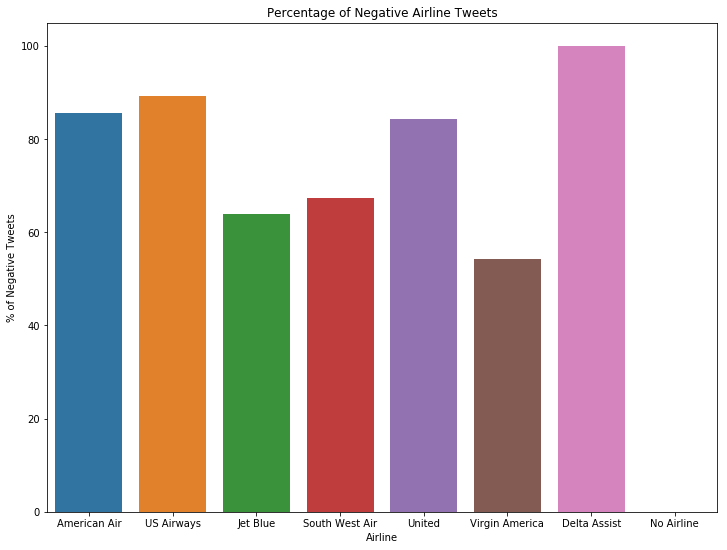

In [115]:
sns.barplot(x='Airline',y='% of Negative Tweets',data=airline_counter_df).set_title('Percentage of Negative Airline Tweets')

As can be seen above the airline with the largest percentage of negative tweets is Delta Assist, but since there are only 2 tweets mentioning them, it isn't really all that relevant. The airline with a larger than 1,000 tweet count with the greatest negative percentage of tweets is US Airways.

##### 5.3 Second Model Analysis

The second model was not able to predict the correct negative reason very well at all. In fact its accuracy was only around 55% (at the time of running). One possible reason for this poor performance could be due to Class Imbalances. In the cell below I calculate the number of times each negative reason was in the negative airlines dataset. As can be seen there is significantly more negative counts associated with "Customer Service Issues" (2,910 entries) than many other reasons such as "Damaged Luggage" which only has 74 entries. This large difference in the number of negative reasons is causing class imbalances making it harder for the model to predict the classes associated with these less represented data entries.


In [116]:
negative_reason = [0]*10
for i in range (0, len(df_airline_2)):
    if df_airline_2["negative_reason"][i] == ("Bad Flight"):
        negative_reason[0] = negative_reason[0] + 1
    elif df_airline_2["negative_reason"][i] == ("Cancelled Flight"):
        negative_reason[1] = negative_reason[1] + 1
    elif df_airline_2["negative_reason"][i] == ("Can't Tell"):
        negative_reason[2] = negative_reason[2] + 1
    elif df_airline_2["negative_reason"][i] == ("Customer Service Issue"):
        negative_reason[3] = negative_reason[3] + 1
    elif df_airline_2["negative_reason"][i] == ("Damaged Luggage"):
        negative_reason[4] = negative_reason[4] + 1
    elif df_airline_2["negative_reason"][i] == ("Flight Attendant Complaints"):
        negative_reason[5] = negative_reason[5] + 1
    elif df_airline_2["negative_reason"][i] == ("Flight Booking Problems"):
        negative_reason[6] = negative_reason[6] + 1
    elif df_airline_2["negative_reason"][i] == ("Late Flight"):
        negative_reason[7] = negative_reason[7] + 1
    elif df_airline_2["negative_reason"][i] == ("longlines"):
        negative_reason[8] = negative_reason[8] + 1
    elif df_airline_2["negative_reason"][i] == ("Lost Luggage"):
        negative_reason[9] = negative_reason[9] + 1

In [117]:
negative_reason_df = pd.DataFrame(negative_reason, columns=['Negative Reason Counter'])
negative_reason_df["Negative Reason"] = ("Bad Flight","Cancelled", "Can't Tell", "Customer Service Issue", "Damaged Luggage", "Flight Attendant Complaints", "Flight Booking Problems", "Late Flight", "longlines", "Lost Luggage")
negative_reason_df

,Negative Reason Counter,Negative Reason
0,580,Bad Flight
1,847,Cancelled
2,1190,Can't Tell
3,2910,Customer Service Issue
4,74,Damaged Luggage
5,481,Flight Attendant Complaints
6,529,Flight Booking Problems
7,1665,Late Flight
8,178,longlines
9,724,Lost Luggage


Text(0.5, 1.0, 'Negative Reason Count')

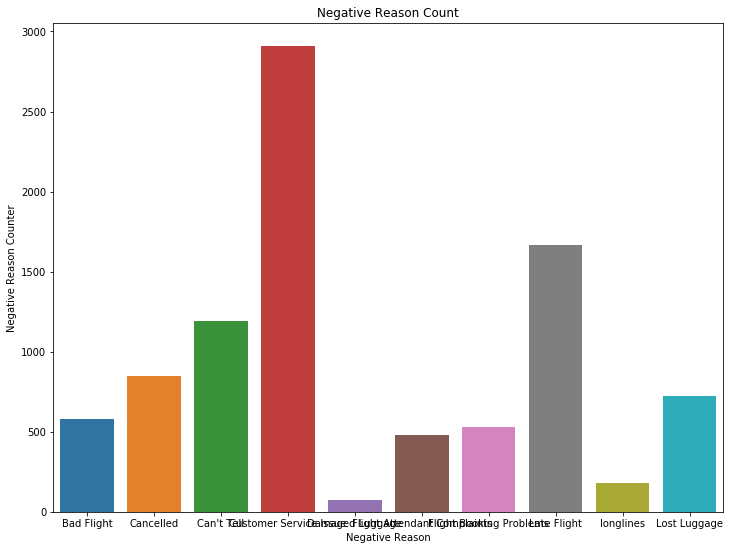

In [118]:
sns.barplot(x='Negative Reason',y='Negative Reason Counter',data=negative_reason_df).set_title('Negative Reason Count')

##### 5.4 How to Increase Model Accuracy

To increase model accuracy for the first model, hyperparamter tuning could be conducted. Since this is a binary classification problem using logistic regression the hyperparameter of interest for tuning is "C" or the Inverse of Regularization Strength. In the logistic regression model, C = 1/lambda. Lambda (λ) controls the trade-off between allowing the model to increase it's complexity vs maintaining it simple. If λ is low, the model will increase it's complexity (overfit) by assigning larger values to the weights for each parameter. If, we increase the value of λ, the model will underfit. Since C is the inverse of lambda it operates in the opposite manner. Increasing regularization strength will result in underfitting and decreasing regularization strenght will result in overfitting. One way to test this out would be to test out varying values of C through a loop and determining the impact on model accuracy. Plotting these accuracies in a validation curve can give an good understanding of which C value best impacts the model. Additionally, normailization of the input features could occur. Since in my model I have included Tweet Score, Tweet Character Length, Tweet Word Length, and Number of Matches with Corpus as features and since these values are typically much larger than the frequencies of the most common words computed using Bag of Words, there may be class imbalances in the input features. Normalizing these features may have a postive impact on the accuracy of the model. 

To increase model accuracy for the second model, the first suggestion that comes to mind is either adding to this dataset such that there are adequately similar representations for the number of times each negative reason is present. Doing so would remove the class imbalances and prevent the model from predicting one class signifciantly more than another. Additionally if additional data is not available the class weight option in sklearn for the logistic regression model can be altered to help prevent some of this class imbalance as well.

### Bonus
In addition to the above exploratory analysis in part 2, I thought it would be interesting to see some more graphics. A personal favourite of mine is the Word Cloud. Further since we seperated the negative tweets above from the postive tweets, I thought comparing the respective word clouds for the whole airline dataset to just the negative tweets would be interesting. This is done below.

In [119]:
#pip install wordcloud
from wordcloud import WordCloud

Lets start with the original dataframe that includes both the positve and negative tweets. I will be using the cleaned text from part 1.

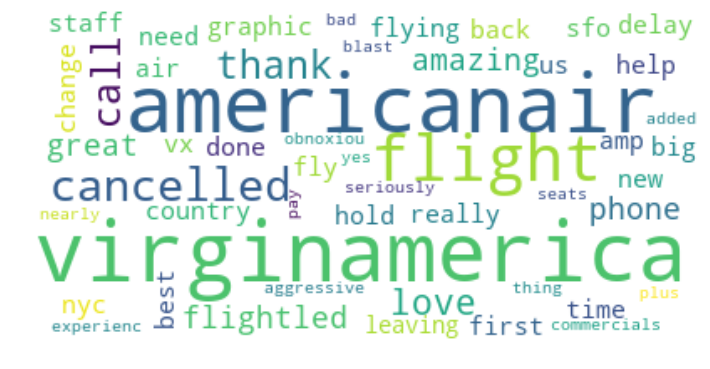

In [120]:
text = df_airline["Clean Text"]

wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(str(text))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Here as expected you can see two airlines along with a mix of some pretty general terms such as big, us, back, thing. There are also some words in larger sized text that have a strong sentiment attached to them as per the provided corpus, inlcuding cancelled, love, aggressive, thank, amazing, and bad.

Next lets look at just the negative tweet wordcloud.

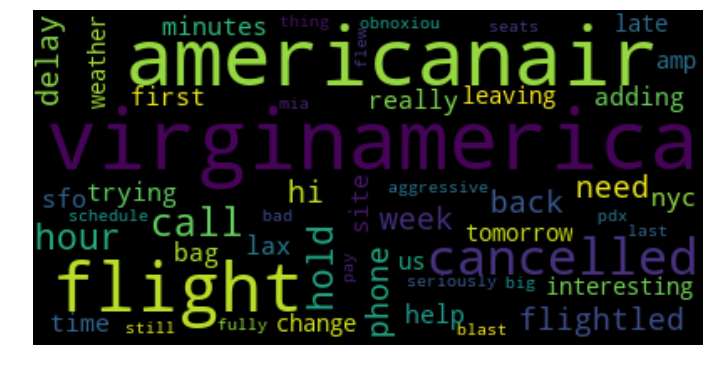

In [121]:
text = df_airline_2["Clean Text"]

wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="black").generate(str(text))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Here we see some airlines mentioned again but also several strong negative terms as per the provided corpus inlcuding obnoxious, bad, aggressive, lax, help, seriously, and delay. There is also a mixture of common terms such as thing, really, and site.

I also thought it would be interesting to see a boxplot of the length for both the generic tweet dataset and airline tweet dataset for the cleaned dataset. This is done below:

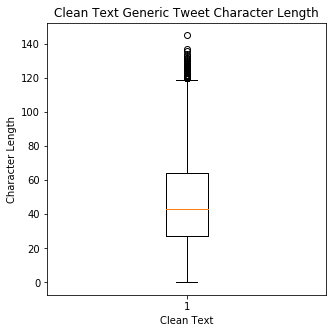

In [122]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df_generic["Tweet Character Length"])
ax.set_xlabel('Clean Text')
ax.set_ylabel('Character Length')
ax.set_title('Clean Text Generic Tweet Character Length')
plt.show()

As can be seen in the Clean Text Generic Tweet Character Length boxplot, the median character length is around 40 with a maximum close to 120, and a minimum at 1. It is interesting to note that there appears to be several statistical outliers shown by the empty circles that exceed the maximum bar line. The largest outlier shown had a tweet character length of 145. Depending on when this dataset was collected this could show an error in the dataset as prior to 2017 the maximum twitter character length was 140, after it was increased to 280 characters. Considering that I am plotting the character length for the cleaned data set, it stands to reason that the unfiltered data would only be larger in legnth.

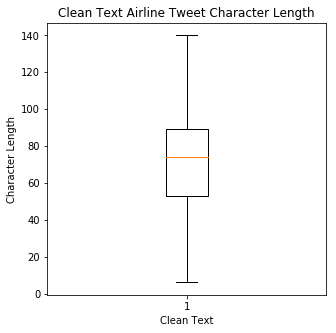

In [123]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df_airline["Tweet Character Length"])
ax.set_xlabel('Clean Text')
ax.set_ylabel('Character Length')
ax.set_title('Clean Text Airline Tweet Character Length')
plt.show()

Similarily to what was done for the Cleant Text Generic Tweet Character Length, I have plotted the boxplot for the Clean Text Airline Tweet Character Length. As can be seen in this boxplot, the median character length is around 75 with a maximum of 140, and a minimum at 6.

As one more item I would like to train a logistic regression model on the airline dataset and evaluate its accuracy. To do this I will set the target variable as the sentiment in the df_airline dataframe. This is done below

In [124]:
matrix_4 = CountVectorizer(max_features = 1000)
X_airline = (matrix_2.fit_transform(df_airline["Clean Text"]).toarray())
y_airline = df_airline["sentiment"]

In [125]:
X_df_airline = pd.DataFrame(X_airline, columns=[['']*1000])
X_df_airline.head()

,,,,,,,,,,,...,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [126]:
X_df_airline["Tweet Score"] = df_airline["Tweet Score"]
X_df_airline["Tweet Character Length"] = df_airline["Tweet Character Length"]
X_df_airline["Tweet Word Length"] = df_airline["Tweet Word Length"]
X_df_airline["Number of Matches with Corpus"] = df_airline["Number of Matches"]
X_df_airline.head()

,,,,,,,,,,,...,,,,,,,Tweet Score,Tweet Character Length,Tweet Word Length,Number of Matches with Corpus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,53,6,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-5,94,11,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-2,34,5,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-4,81,12,2
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,59,11,1


In [127]:
X_train, X_test, y_train, y_test = train_test_split(X_df_airline, y_airline, test_size = 0.3)

model = LogisticRegression()
model.fit(X_train,y_train)
predictions_airline_sentiment = model.predict(X_test)
score = accuracy_score(y_test,predictions_airline_sentiment)

print (score*100)

C:\Users\btarras\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


91.82789488882473


As can be seen above the model accuracy is quite high at around 92%. But it would be good to look at how many postives and negatives the model is actually predicitng, as this has an impact on answering the research quesiton of "What can public opinion on Twitter tell us about the US airlines in 2015". This is done below:

In [128]:
airline_sentiment_counter = [0]*2

for i in range (0,len(predictions_airline_sentiment)):
    if predictions_airline_sentiment[i] == ("positve"):
        airline_sentiment_counter[1] = airline_sentiment_counter[1] + 1
    else:
        airline_sentiment_counter[0] = airline_sentiment_counter[0] + 1
print (airline_sentiment_counter)
print (len(y_test))

[3463, 0]
3463


As can be seen the model is predicting all negatives (test data size is 3,463). This is expected as the dataset has a high negative sample bias. And as such is not a very good model. With this said the results of this model do coincide with the general conclusion from the previous model, that being that the the general consensus of public opinion on US airlines is largely negative. That is to say most public tweets about airlines is negative in nature.